
# <p style="background-color:  #00008B; font-family:newtimeroman;font-size:180%;color:#FFF9ED;text-align:center;border-radius:80px 20px;"><b> Logistic Regression Project<b></div> 

<p style="text-align: center;"><img src="2.jpg" style="width: 100%; height: 500px; object-fit: cover;">
</p>

<p style="background-color: darkviolet; font-family: newtimeroman; font-size: 300%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b>Raisin Class Prediction</b>
<img src="R (1).png" style="width: 150px; vertical-align: left; margin-left: 20px; float:right;" >
<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 

</p>



###### **Data Set Information:**

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


**Attribute Information:**

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Exploratory Data Analysis and Visualization

In [4]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524          442.246          253.291         0.820       90546   
1    75166          406.691          243.032         0.802       78789   
2    90856          442.267          266.328         0.798       93717   
3    45928          286.541          208.760         0.685       47336   
4    79408          352.191          290.828         0.564       81463   
..     ...              ...              ...           ...         ...   
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter    Class  
0     0.759   1184.040  Kecimen  
1     0.684   1121.786  Kecimen  
2     0.638   1208.575  Kecimen  
3     0.700    844.162  Kecimen  
4     0.793   1073.251  Kecimen  
..      ...        ...      ...  
895   0.669   1129.072    Besni  
896   0.636   1214.252    Besni  
897   0.741   1292.828    Besni  
898   0.659   1258.548    Besni  
899   0.632   1272.862    Besni  

[900 rows x 8 columns]

In [5]:
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   
3  45928          286.541          208.760         0.685       47336   0.700   
4  79408          352.191          290.828         0.564       81463   0.793   

   Perimeter    Class  
0   1184.040  Kecimen  
1   1121.786  Kecimen  
2   1208.575  Kecimen  
3    844.162  Kecimen  
4   1073.251  Kecimen

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
df.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

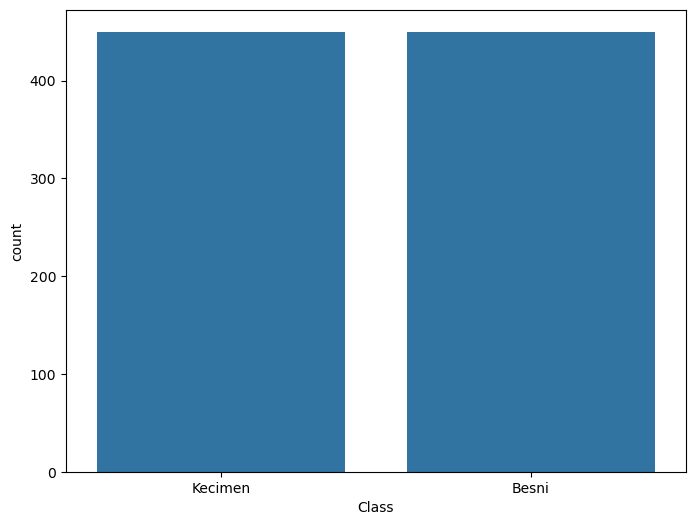

In [8]:
sns.countplot(data=df, x="Class");

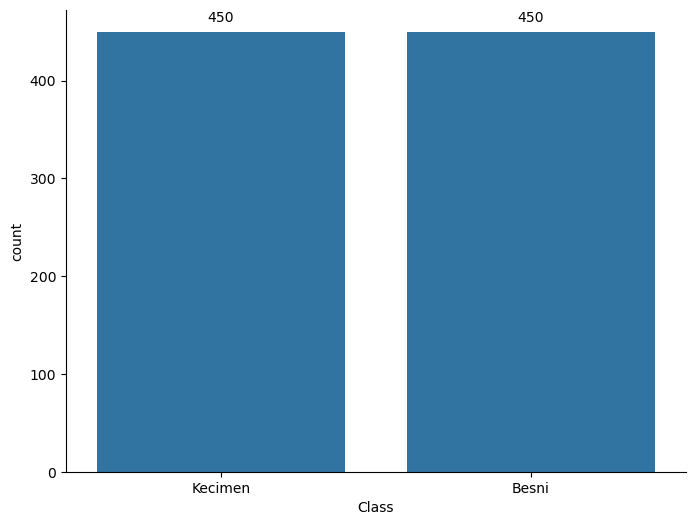

In [9]:

ax = sns.countplot(x=df["Class"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [10]:
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

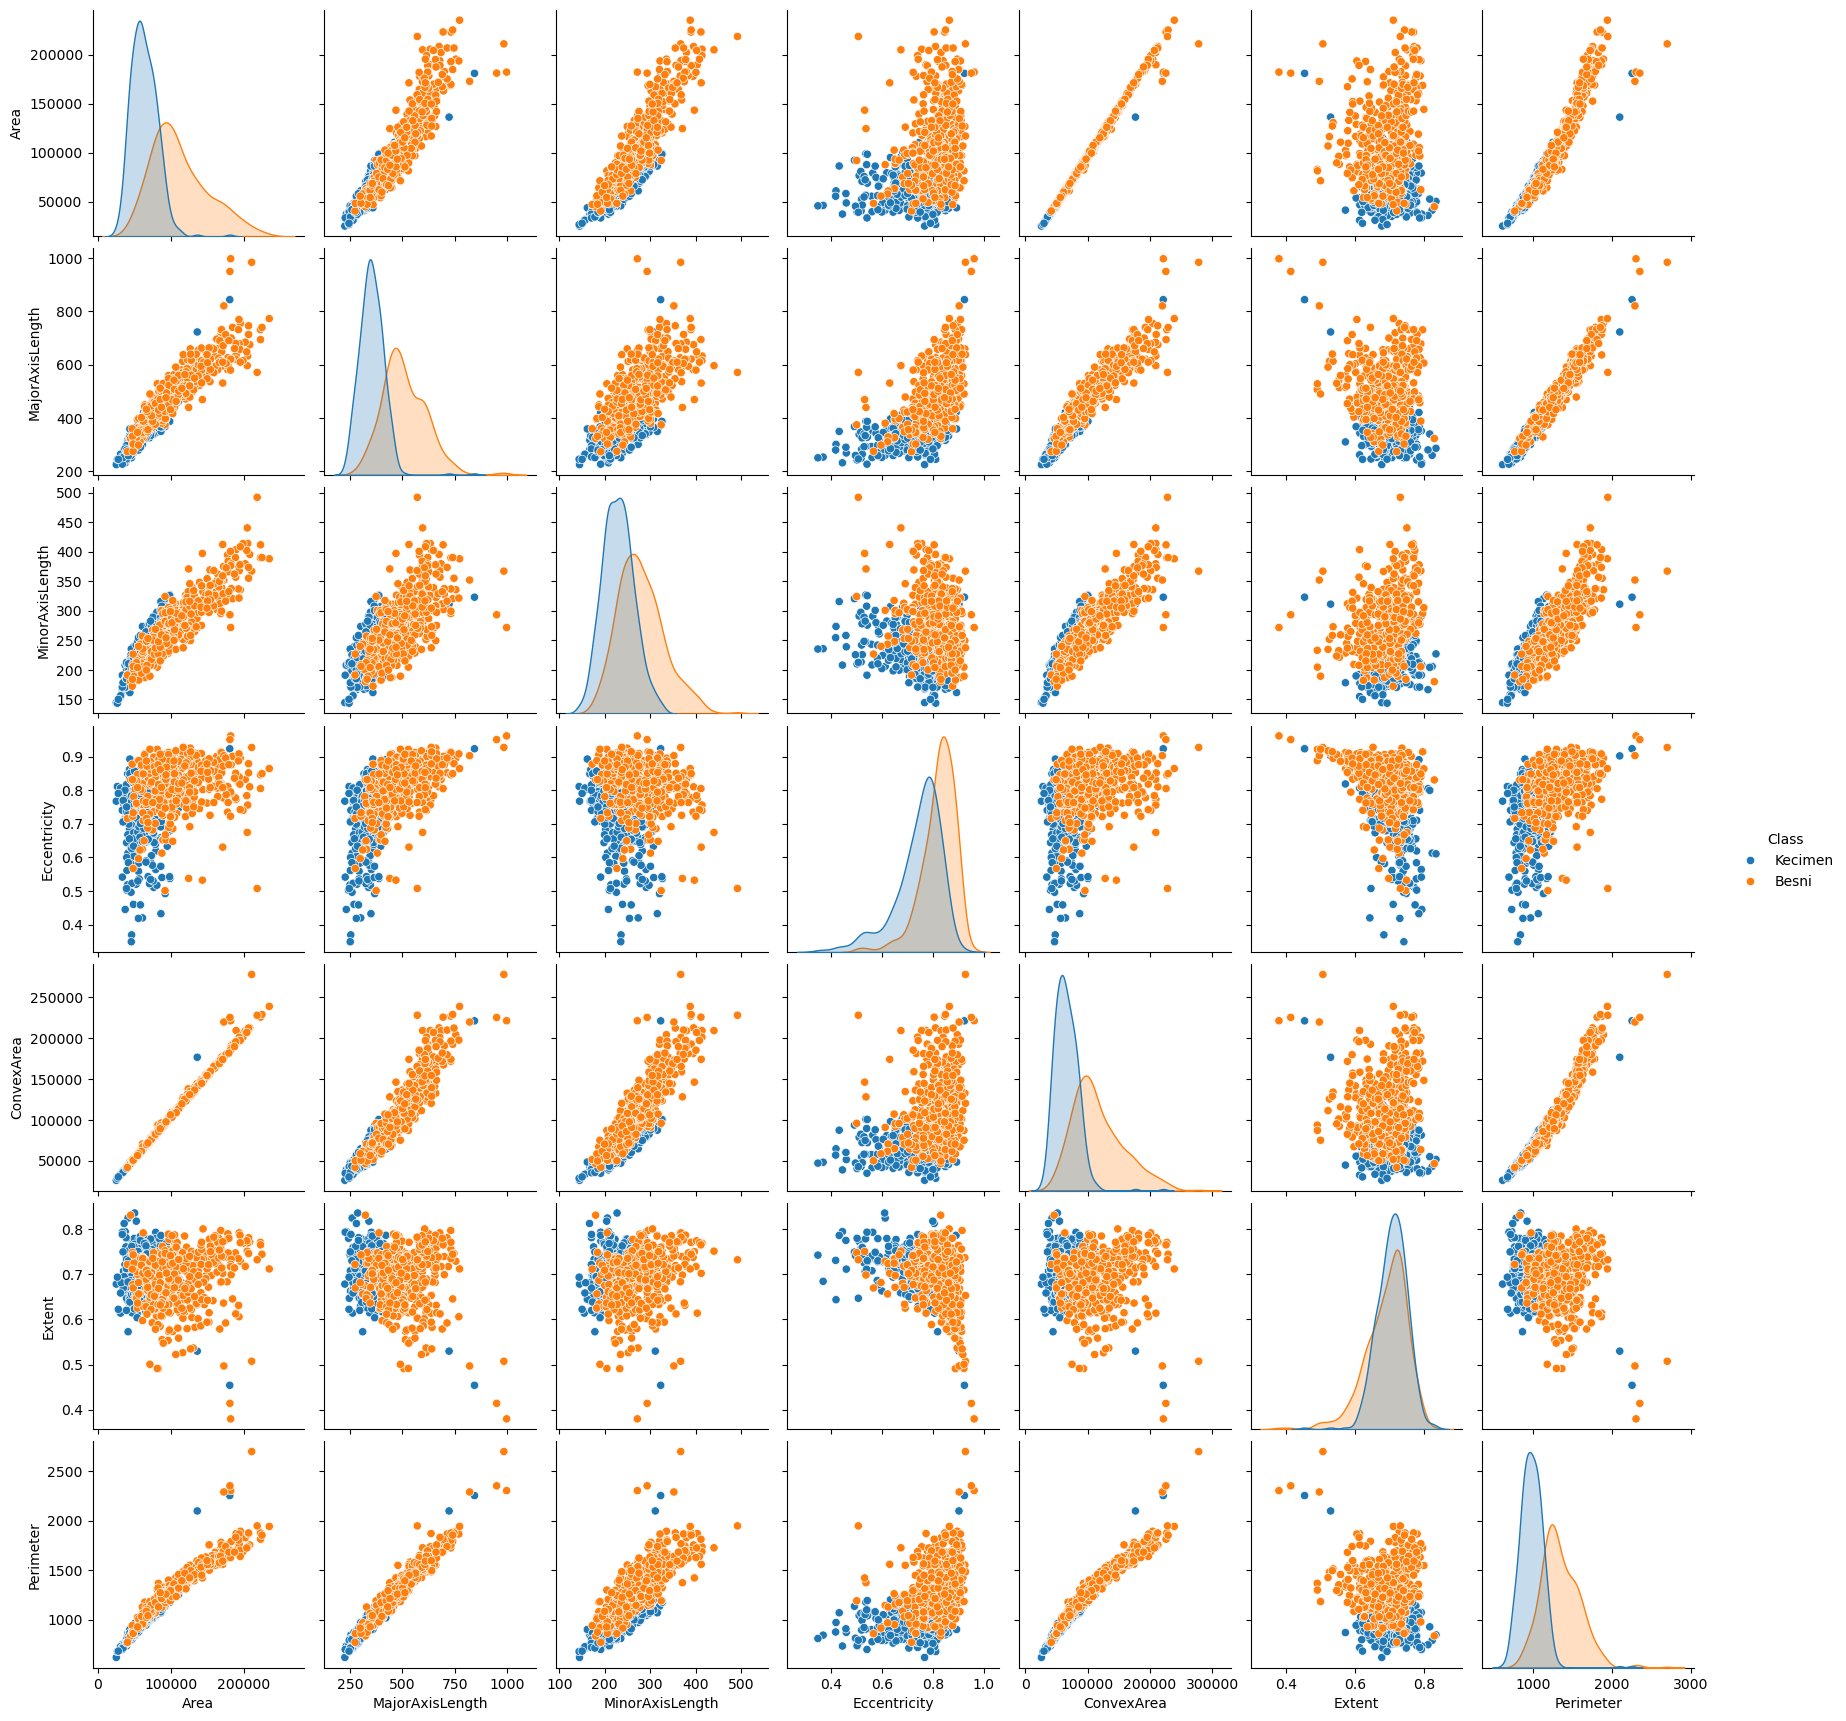

In [11]:
sns.pairplot(df, hue = "Class");

In [12]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#matplotlib notebook

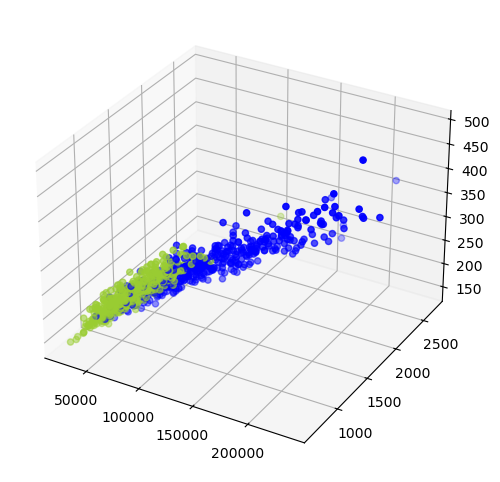

In [13]:
#%matplotlib notebook


# Örnek veri seti ve 'Class' sütununa göre renk ayarlama
class_colors = {
    "Kecimen": "yellowgreen",
    "Besni": "blue"
}

# 'Class' sütunundaki değerleri renklerle eşle
colors = df["Class"].replace(class_colors)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Eşlenmiş renklerle saçılım grafiği çiz
ax.scatter(df["Area"], df["Perimeter"], df["MinorAxisLength"], c=colors)

plt.show()



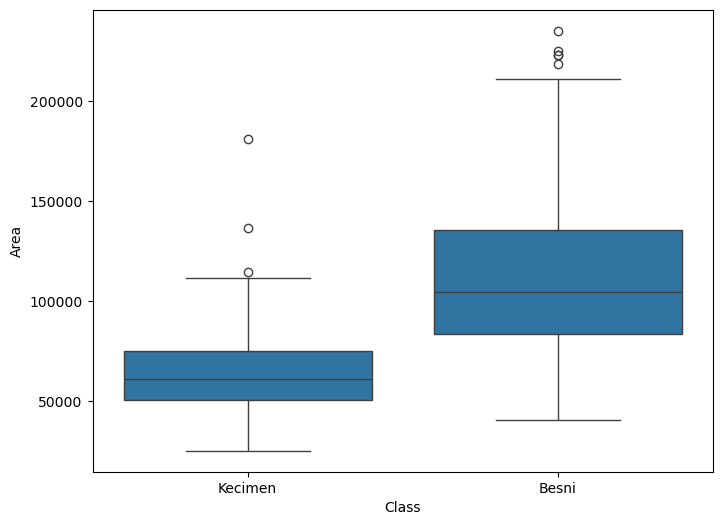

In [14]:
sns.boxplot(x="Class", y = "Area", data = df);

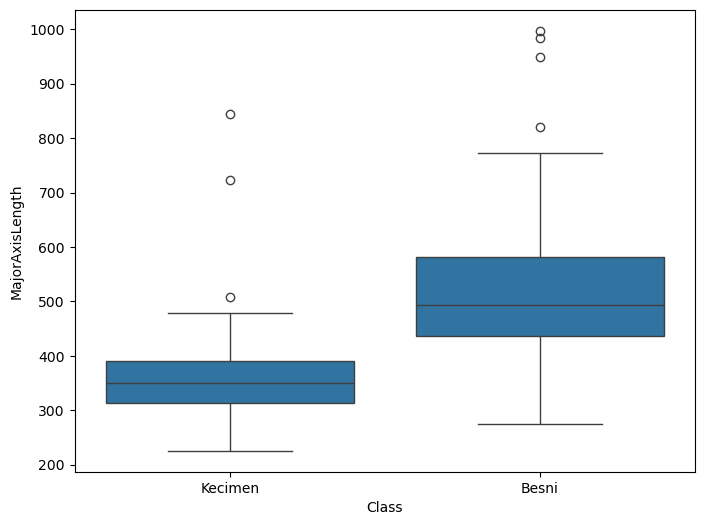

In [15]:
sns.boxplot(x="Class", y = "MajorAxisLength", data = df);

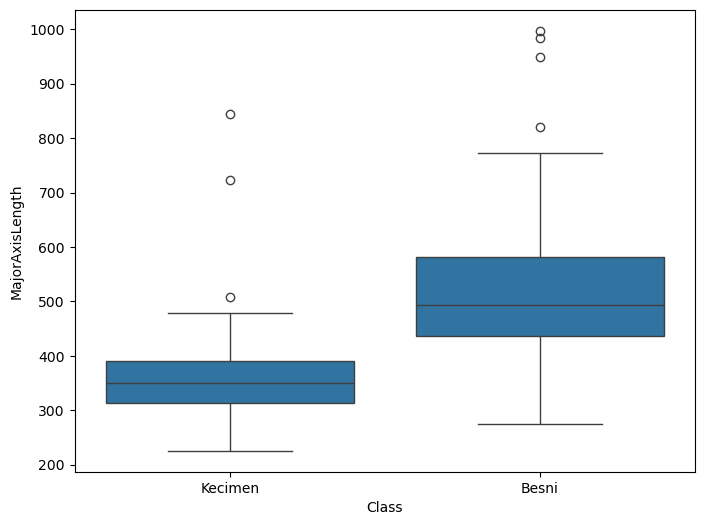

In [16]:
sns.boxplot(x="Class", y = "MajorAxisLength", data = df);

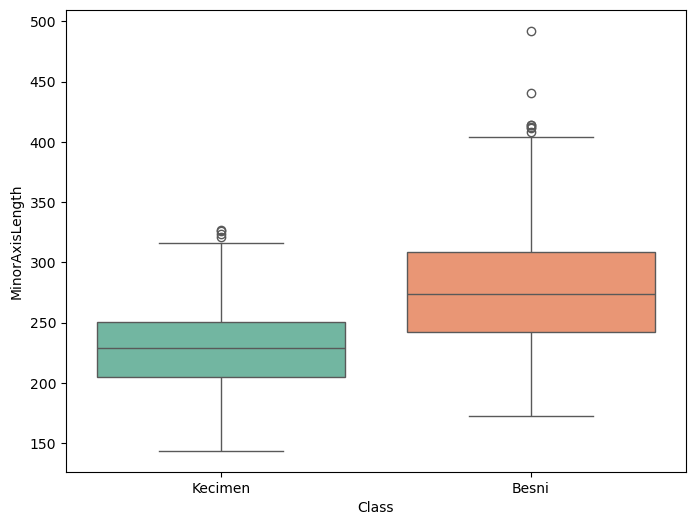

In [17]:
sns.boxplot(x="Class", y = "MinorAxisLength", data = df, palette='Set2');

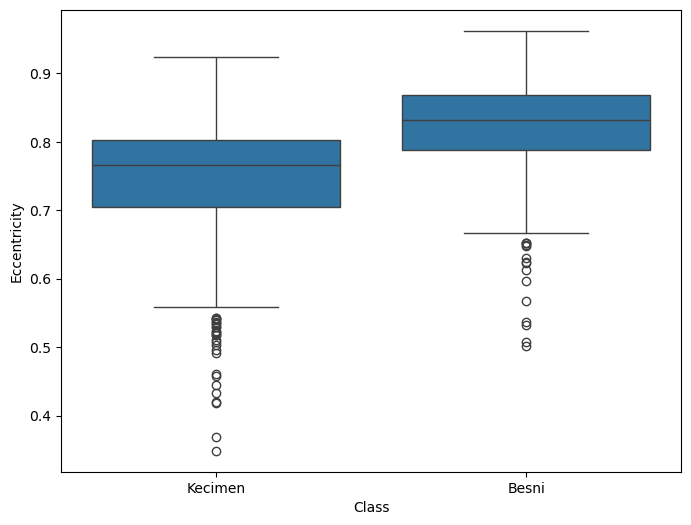

In [18]:
sns.boxplot(x="Class", y = "Eccentricity", data = df);

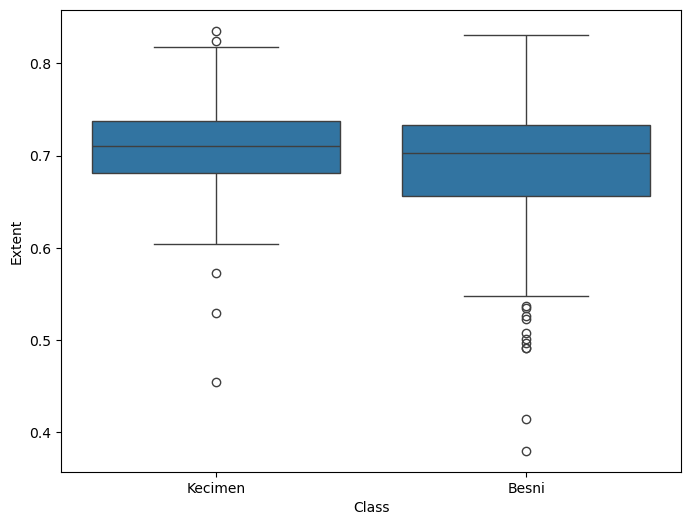

In [19]:
sns.boxplot(x="Class", y = "Extent", data = df);

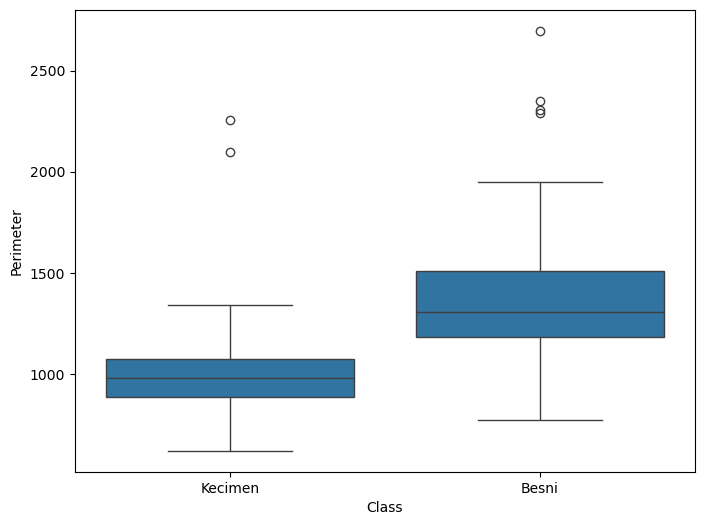

In [20]:
sns.boxplot(x="Class", y = "Perimeter", data = df);

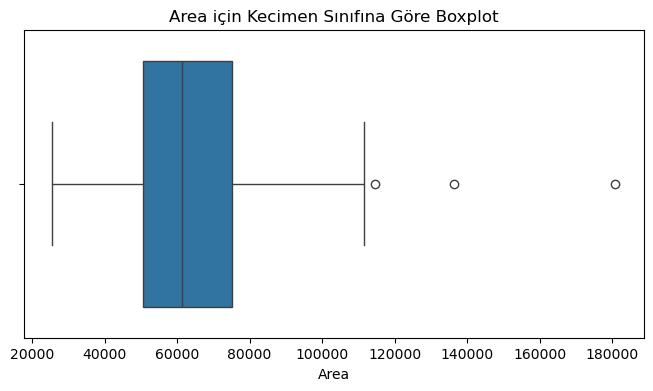

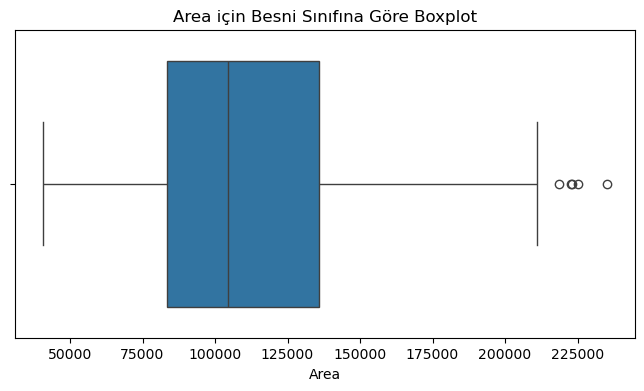

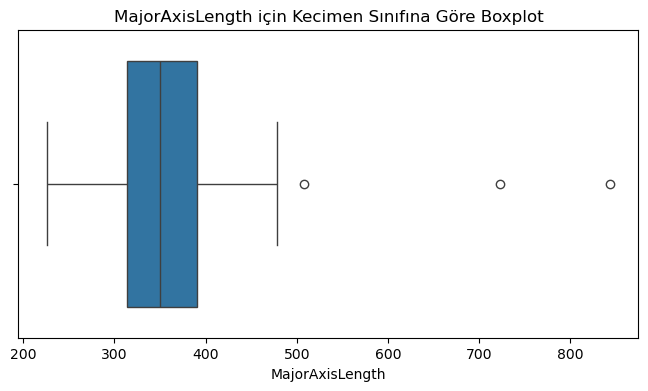

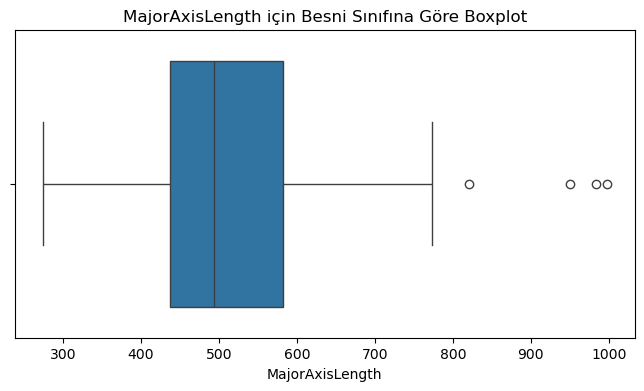

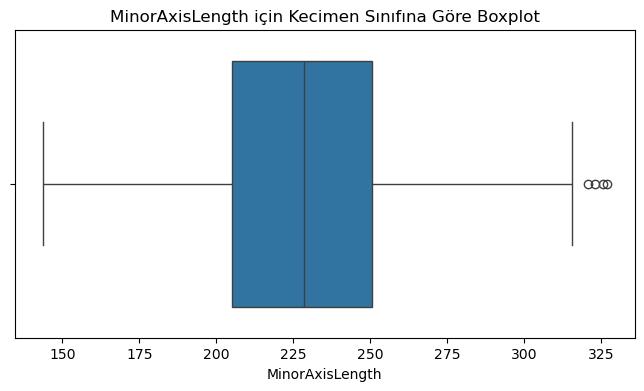

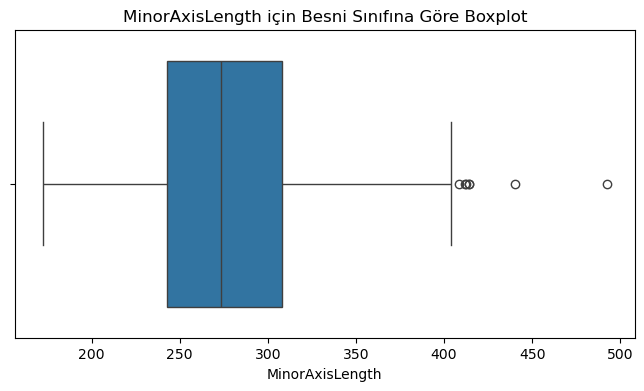

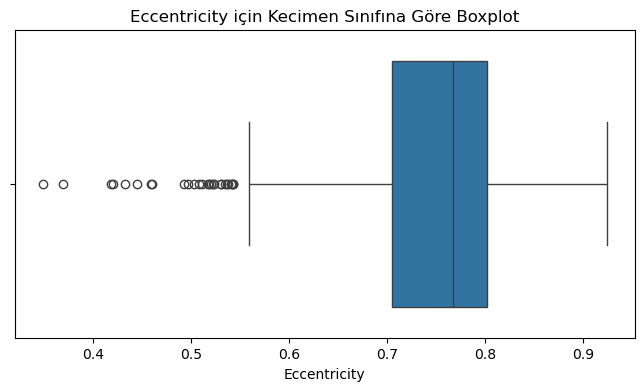

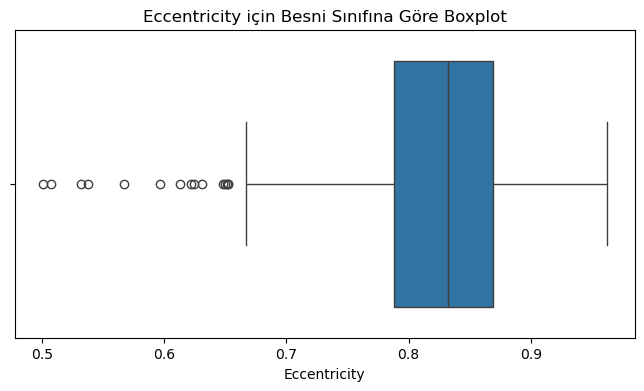

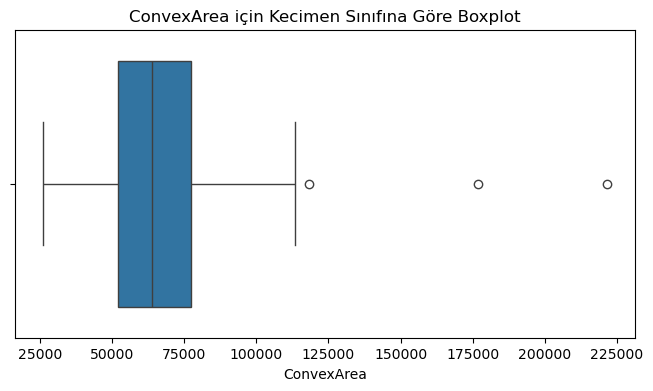

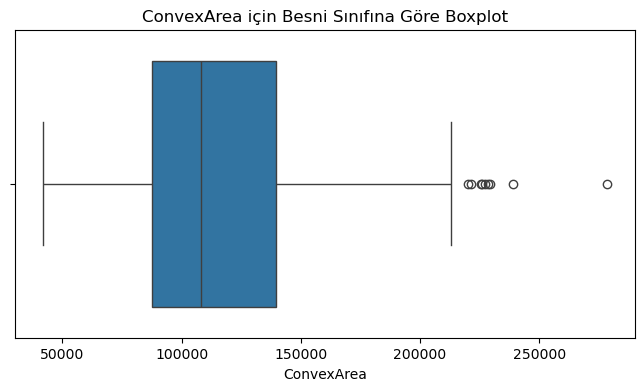

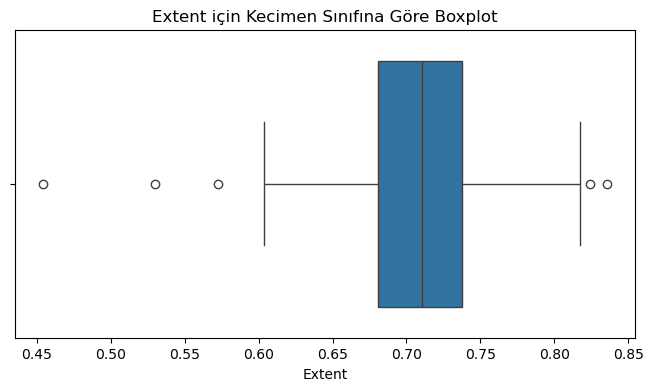

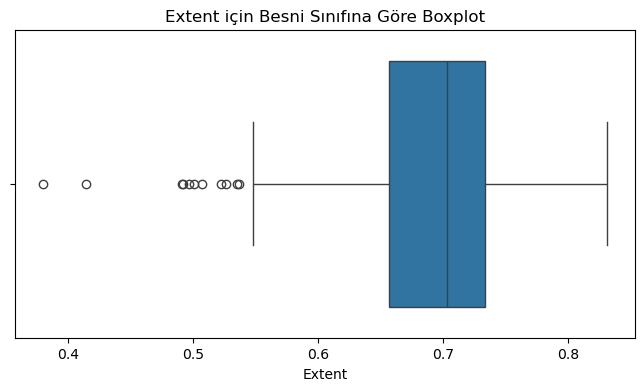

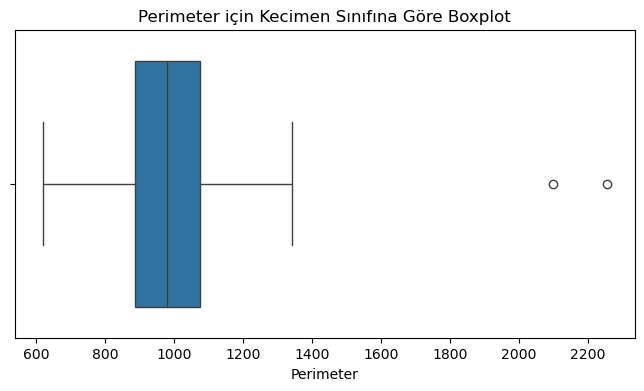

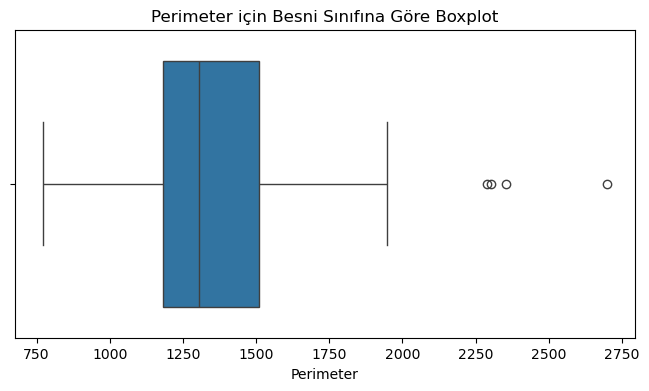

In [21]:
for col in df.select_dtypes(include=['number']).columns:
    # Hedef sınıfın benzersiz değerleri için döngü
    for cls in df['Class'].unique():
        plt.figure(figsize=(8, 4))
        # Sadece mevcut sınıfa ait verileri filtreleyerek boxplot
        sns.boxplot(x=df[df['Class'] == cls][col])
        plt.title(f"{col} için {cls} Sınıfına Göre Boxplot")
        plt.show()

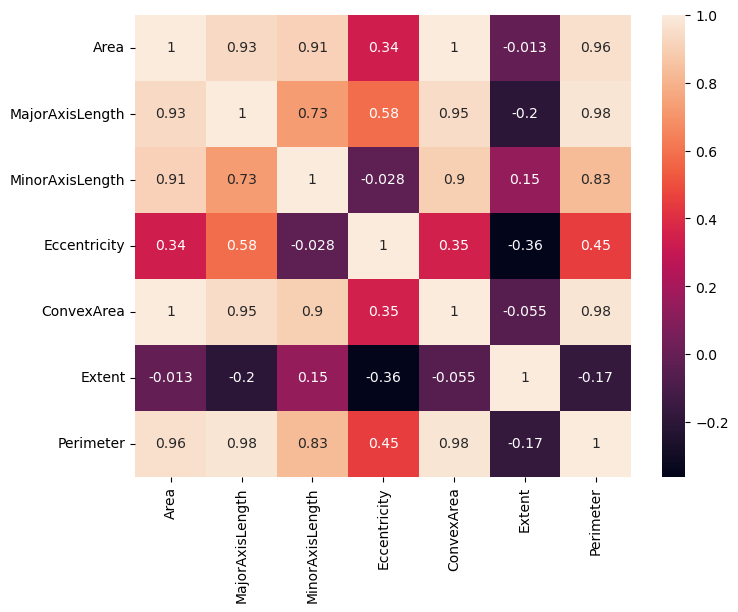

In [22]:
sns.heatmap(df.corr(numeric_only =True), annot= True);

In [23]:
df=df.drop("ConvexArea", axis=1)
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  Perimeter  \
0    87524          442.246          253.291         0.820   0.759   1184.040   
1    75166          406.691          243.032         0.802   0.684   1121.786   
2    90856          442.267          266.328         0.798   0.638   1208.575   
3    45928          286.541          208.760         0.685   0.700    844.162   
4    79408          352.191          290.828         0.564   0.793   1073.251   
..     ...              ...              ...           ...     ...        ...   
895  83248          430.077          247.839         0.817   0.669   1129.072   
896  87350          440.736          259.293         0.809   0.636   1214.252   
897  99657          431.707          298.837         0.722   0.741   1292.828   
898  93523          476.344          254.176         0.846   0.659   1258.548   
899  85609          512.082          215.272         0.907   0.632   1272.862   

       Class  
0    Kecimen  
1    Kecimen  
2    Kecimen  
3    Kecimen  
4    Kecimen  
..       ...  
895    Besni  
896    Besni  
897    Besni  
898    Besni  
899    Besni  

[900 rows x 7 columns]

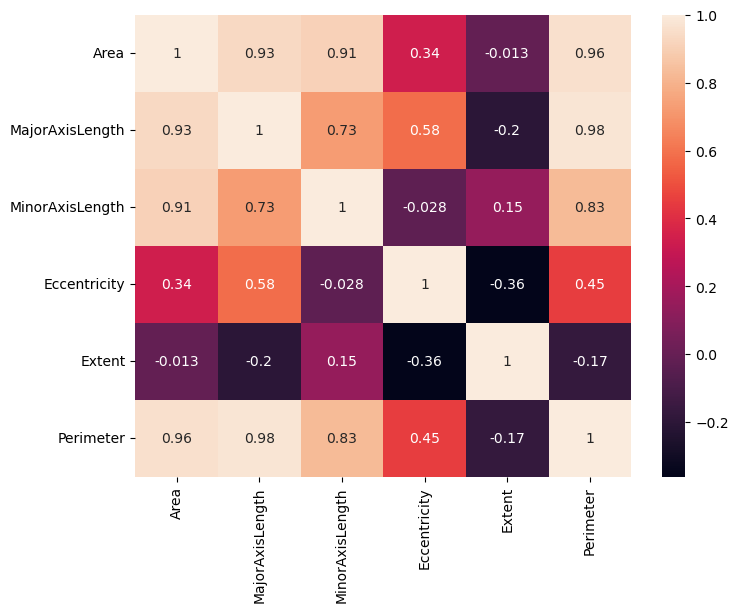

In [24]:
sns.heatmap(df.corr(numeric_only =True), annot= True);

## Train | Test Split and Scaling

In [25]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,    stratify=y,random_state=42)

## Scaling

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

## Modelling

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  Perimeter  \
0  87524          442.246          253.291         0.820   0.759   1184.040   
1  75166          406.691          243.032         0.802   0.684   1121.786   
2  90856          442.267          266.328         0.798   0.638   1208.575   
3  45928          286.541          208.760         0.685   0.700    844.162   
4  79408          352.191          290.828         0.564   0.793   1073.251   

     Class  
0  Kecimen  
1  Kecimen  
2  Kecimen  
3  Kecimen  
4  Kecimen

In [34]:
log_model.coef_

array([[-0.69670278, -1.0257765 ,  1.02789085,  0.11511067,  0.20191918,
        -2.54383168]])

In [35]:
log_model.intercept_

array([-0.52104145])

In [36]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besn

In [37]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[4.98922300e-01, 5.01077700e-01],
       [2.22487453e-01, 7.77512547e-01],
       [8.99698766e-01, 1.00301234e-01],
       [9.99840683e-01, 1.59316762e-04],
       [6.44156719e-01, 3.55843281e-01],
       [1.25910602e-02, 9.87408940e-01],
       [4.01227507e-01, 5.98772493e-01],
       [8.93197115e-01, 1.06802885e-01],
       [2.56172316e-02, 9.74382768e-01],
       [4.94659241e-01, 5.05340759e-01],
       [9.99791639e-01, 2.08361487e-04],
       [3.54220589e-01, 6.45779411e-01],
       [9.82617834e-01, 1.73821660e-02],
       [8.07581702e-01, 1.92418298e-01],
       [8.49414394e-02, 9.15058561e-01],
       [9.96523202e-01, 3.47679842e-03],
       [3.14486692e-01, 6.85513308e-01],
       [8.45451542e-01, 1.54548458e-01],
       [3.35493295e-01, 6.64506705e-01],
       [4.22788374e-01, 5.77211626e-01],
       [1.91765729e-01, 8.08234271e-01],
       [1.28639982e-01, 8.71360018e-01],
       [9.26225582e-01, 7.37744179e-02],
       [9.99999762e-01, 2.38069571e-07],
       [1.552574

In [38]:
np.set_printoptions(suppress = True)
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.4989223 , 0.5010777 ],
       [0.22248745, 0.77751255],
       [0.89969877, 0.10030123],
       [0.99984068, 0.00015932],
       [0.64415672, 0.35584328],
       [0.01259106, 0.98740894],
       [0.40122751, 0.59877249],
       [0.89319711, 0.10680289],
       [0.02561723, 0.97438277],
       [0.49465924, 0.50534076],
       [0.99979164, 0.00020836],
       [0.35422059, 0.64577941],
       [0.98261783, 0.01738217],
       [0.8075817 , 0.1924183 ],
       [0.08494144, 0.91505856],
       [0.9965232 , 0.0034768 ],
       [0.31448669, 0.68551331],
       [0.84545154, 0.15454846],
       [0.3354933 , 0.6645067 ],
       [0.42278837, 0.57721163],
       [0.19176573, 0.80823427],
       [0.12863998, 0.87136002],
       [0.92622558, 0.07377442],
       [0.99999976, 0.00000024],
       [0.01552575, 0.98447425],
       [0.2861175 , 0.7138825 ],
       [0.0448905 , 0.9551095 ],
       [0.06212985, 0.93787015],
       [0.88389427, 0.11610573],
       [0.79630498, 0.20369502],
       [0.

In [39]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  \
379   79100          413.496          246.405         0.803   0.655   
279   79510          380.719          267.034         0.713   0.732   
713  104728          495.672          272.687         0.835   0.730   
580  206720          713.473          373.643         0.852   0.781   
726   86658          439.229          258.304         0.809   0.700   
..      ...              ...              ...           ...     ...   
9     64380          366.965          227.772         0.784   0.664   
637  160583          630.645          326.245         0.856   0.752   
500  143386          469.277          397.310         0.532   0.750   
541  193032          661.149          376.432         0.822   0.631   
237   52547          358.366          189.207         0.849   0.703   

     Perimeter    Class  
379   1113.607  Kecimen  
279   1075.307  Kecimen  
713   1316.398    Besni  
580   1866.091    Besni  
726   1184.581    Besni  
..         ...      ...  
9      981.544  Kecimen  
637   1646.559    Besni  
500   1422.014    Besni  
541   1744.271    Besni  
237    929.471  Kecimen  

[135 rows x 7 columns]

In [40]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  \
379   79100          413.496          246.405         0.803   0.655   
279   79510          380.719          267.034         0.713   0.732   
713  104728          495.672          272.687         0.835   0.730   
580  206720          713.473          373.643         0.852   0.781   
726   86658          439.229          258.304         0.809   0.700   
..      ...              ...              ...           ...     ...   
9     64380          366.965          227.772         0.784   0.664   
637  160583          630.645          326.245         0.856   0.752   
500  143386          469.277          397.310         0.532   0.750   
541  193032          661.149          376.432         0.822   0.631   
237   52547          358.366          189.207         0.849   0.703   

     Perimeter    Class  pred_proba  
379   1113.607  Kecimen       0.501  
279   1075.307  Kecimen       0.778  
713   1316.398    Besni       0.100  
580   1866.091    Besni       0.000  
726   1184.581    Besni       0.356  
..         ...      ...         ...  
9      981.544  Kecimen       0.822  
637   1646.559    Besni       0.002  
500   1422.014    Besni       0.207  
541   1744.271    Besni       0.001  
237    929.471  Kecimen       0.849  

[135 rows x 8 columns]

In [41]:
test_data["pred"] = y_pred
test_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  \
379   79100          413.496          246.405         0.803   0.655   
279   79510          380.719          267.034         0.713   0.732   
713  104728          495.672          272.687         0.835   0.730   
580  206720          713.473          373.643         0.852   0.781   
726   86658          439.229          258.304         0.809   0.700   
..      ...              ...              ...           ...     ...   
9     64380          366.965          227.772         0.784   0.664   
637  160583          630.645          326.245         0.856   0.752   
500  143386          469.277          397.310         0.532   0.750   
541  193032          661.149          376.432         0.822   0.631   
237   52547          358.366          189.207         0.849   0.703   

     Perimeter    Class  pred_proba     pred  
379   1113.607  Kecimen       0.501  Kecimen  
279   1075.307  Kecimen       0.778  Kecimen  
713   1316.398    Besni       0.100    Besni  
580   1866.091    Besni       0.000    Besni  
726   1184.581    Besni       0.356    Besni  
..         ...      ...         ...      ...  
9      981.544  Kecimen       0.822  Kecimen  
637   1646.559    Besni       0.002    Besni  
500   1422.014    Besni       0.207    Besni  
541   1744.271    Besni       0.001    Besni  
237    929.471  Kecimen       0.849  Kecimen  

[135 rows x 9 columns]

In [42]:
test_data.sample(20, random_state=11)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  \
143   50445          308.359          208.855         0.736   0.723   
530   90559          473.576          246.920         0.853   0.673   
339   44081          328.587          173.347         0.850   0.638   
685  102868          430.026          312.973         0.686   0.718   
426   56589          343.935          213.133         0.785   0.660   
484  153824          536.607          369.286         0.726   0.739   
538  145693          591.180          321.431         0.839   0.649   
502   71639          400.414          231.620         0.816   0.642   
720   66793          362.231          236.404         0.758   0.684   
379   79100          413.496          246.405         0.803   0.655   
253   39439          246.764          212.635         0.507   0.647   
146   75314          392.652          246.076         0.779   0.705   
713  104728          495.672          272.687         0.835   0.730   
691  141137          600.126          305.767         0.860   0.586   
241   43345          323.859          175.186         0.841   0.649   
245   56096          313.386          232.282         0.671   0.712   
835   87039          497.058          236.213         0.880   0.637   
219   49414          290.458          219.418         0.655   0.711   
431   58570          355.400          214.567         0.797   0.658   
15    33565          261.554          167.708         0.767   0.682   

     Perimeter    Class  pred_proba     pred  
143    851.632  Kecimen       0.964  Kecimen  
530   1328.744    Besni       0.070    Besni  
339    867.003  Kecimen       0.895  Kecimen  
685   1251.802    Besni       0.408    Besni  
426    931.451  Kecimen       0.883  Kecimen  
484   1582.146    Besni       0.018    Besni  
538   1595.364    Besni       0.003    Besni  
502   1101.879    Besni       0.505  Kecimen  
720   1024.169    Besni       0.795  Kecimen  
379   1113.607  Kecimen       0.501  Kecimen  
253    793.005  Kecimen       0.983  Kecimen  
146   1073.768  Kecimen       0.686  Kecimen  
713   1316.398    Besni       0.100    Besni  
691   1495.983    Besni       0.005    Besni  
241    877.020  Kecimen       0.898  Kecimen  
245    929.115  Kecimen       0.941  Kecimen  
835   1271.343    Besni       0.074    Besni  
219    869.188  Kecimen       0.966  Kecimen  
431    962.708  Kecimen       0.836  Kecimen  
15     751.413  Kecimen       0.981  Kecimen

## Model Performance

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [44]:
confusion_matrix(y_test, y_pred)

array([[55, 13],
       [ 1, 66]], dtype=int64)

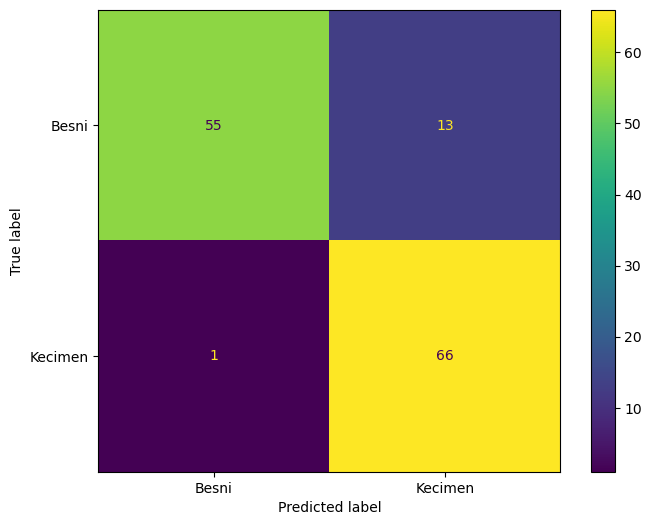

In [45]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

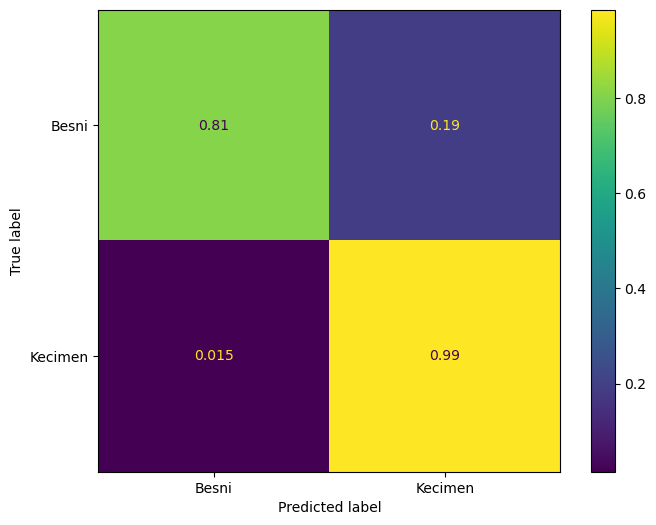

In [46]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='true');## Oransal olarak yorumlamak için

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Besni       0.98      0.81      0.89        68
     Kecimen       0.84      0.99      0.90        67

    accuracy                           0.90       135
   macro avg       0.91      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135



In [48]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       382
     Kecimen       0.85      0.89      0.87       383

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



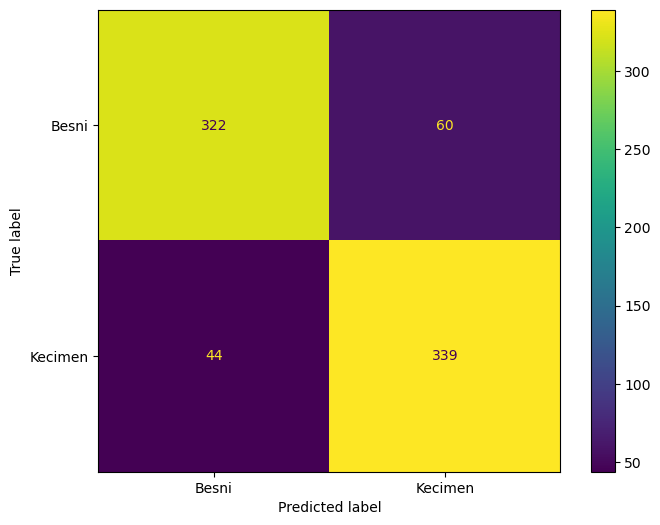

In [49]:
ConfusionMatrixDisplay.from_estimator(log_model, X_train_scaled, y_train);

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[55 13]
 [ 1 66]]
              precision    recall  f1-score   support

       Besni       0.98      0.81      0.89        68
     Kecimen       0.84      0.99      0.90        67

    accuracy                           0.90       135
   macro avg       0.91      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135


Train_Set
[[322  60]
 [ 44 339]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       382
     Kecimen       0.85      0.89      0.87       383

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



### Cross Validate

In [52]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", 
                                                                   "precision_weighted",
                                                                  "recall_weighted",
                                                                  "f1_weighted"], cv = 10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.864
test_precision_weighted   0.867
test_recall_weighted      0.864
test_f1_weighted          0.864
dtype: float64

## Class prediction

In [106]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_besni"] = y_pred_proba[:,0]
test_data["pred_proba_kecimen"] = y_pred_proba[:,1]
test_data.sample(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  \
758   97254          422.044          305.875         0.689   0.633   
22    82028          397.115          268.334         0.737   0.686   
339   44081          328.587          173.347         0.850   0.638   
538  145693          591.180          321.431         0.839   0.649   
508  133101          641.510          265.314         0.910   0.582   
685  102868          430.026          312.973         0.686   0.718   
379   79100          413.496          246.405         0.803   0.655   
599  152267          598.968          331.249         0.833   0.594   
279   79510          380.719          267.034         0.713   0.732   
470   65253          418.998          205.756         0.871   0.666   

     Perimeter    Class     pred  pred_proba_besni  pred_proba_kecimen  
758   1254.468    Besni    Besni             0.667               0.333  
22    1106.355  Kecimen  Kecimen             0.341               0.659  
339    867.003  Kecimen  Kecimen             0.105               0.895  
538   1595.364    Besni    Besni             0.997               0.003  
508   1544.712    Besni    Besni             0.999               0.001  
685   1251.802    Besni    Besni             0.592               0.408  
379   1113.607  Kecimen  Kecimen             0.499               0.501  
599   1570.502    Besni    Besni             0.996               0.004  
279   1075.307  Kecimen  Kecimen             0.222               0.778  
470   1075.404    Besni    Besni             0.540               0.460

### GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty": penalty, 
             "C":C}

In [61]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv = 10)

In [62]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([     0.1       ,      0.20691381,      0.42813324,      0.88586679,
            1.83298071,      3.79269019,      7.8475997 ,     16.23776739,
           33.59818286,     69.51927962,    143.84498883,    297.63514416,
          615.84821107,   1274.2749857 ,   2636.65089873,   5455.59478117,
        11288.37891685,  23357.2146909 ,  48329.30238572, 100000.        ]),
                         'penalty': ['l1', 'l2']})

In [63]:
grid_model.best_score_

0.8653964456596036

In [64]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni'

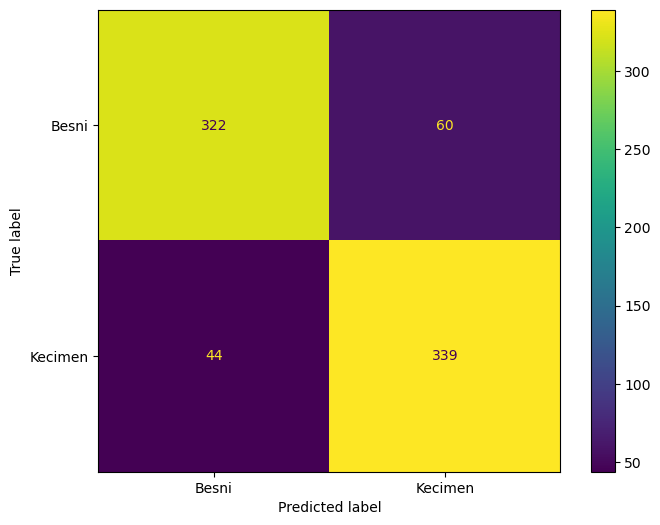

In [80]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_train_scaled, y_train);

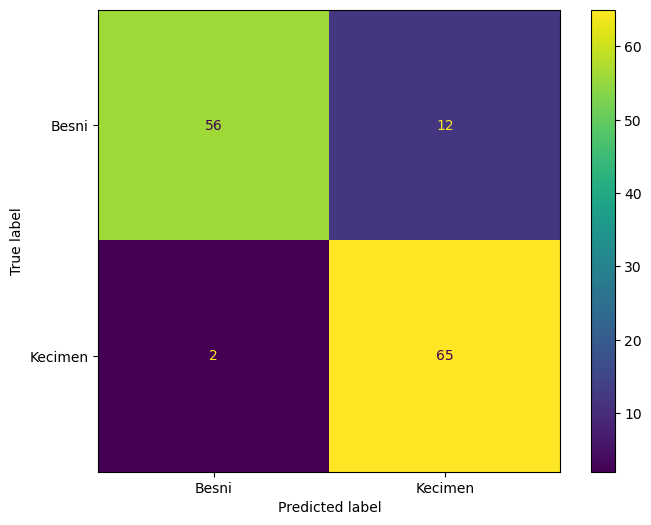

In [81]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaled, y_test);

In [66]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56 12]
 [ 2 65]]
              precision    recall  f1-score   support

       Besni       0.97      0.82      0.89        68
     Kecimen       0.84      0.97      0.90        67

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135


Train_Set
[[322  60]
 [ 44 339]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       382
     Kecimen       0.85      0.89      0.87       383

    accuracy                           0.86       765
   macro avg       0.86      0.86      0.86       765
weighted avg       0.86      0.86      0.86       765



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [67]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

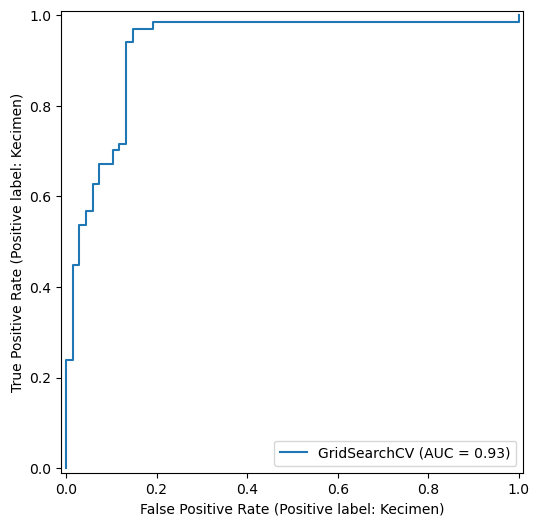

In [68]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test)

In [86]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9295434591747146

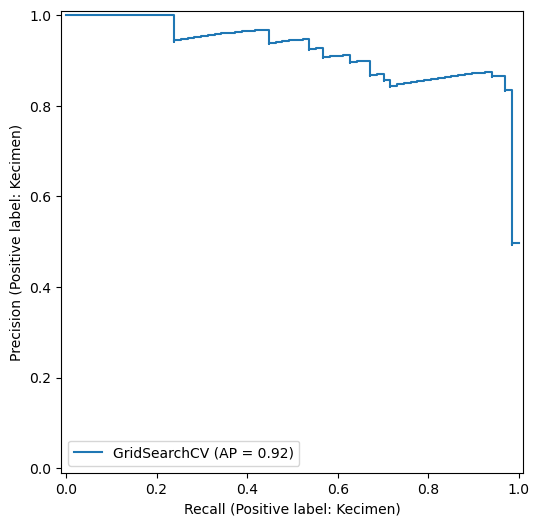

In [85]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test)

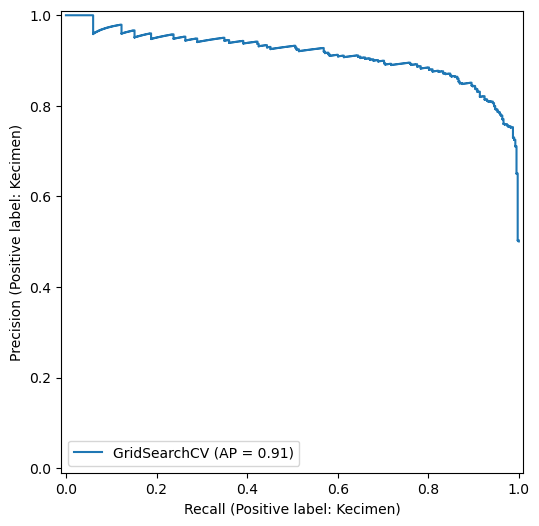

In [71]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train_scaled, y_train)

## Final Model and Model Deployment

In [87]:
scaler = StandardScaler().fit(X)

In [88]:
import pickle
pickle.dump(scaler, open("scaler_raisin", "wb"))

In [89]:
X_scaled = scaler.transform(X)

In [90]:
grid_model.best_params_

{'C': 0.8858667904100825, 'penalty': 'l2'}

In [91]:
final_model = LogisticRegression(C=0.8858667904100825, penalty='l2').fit(X_scaled, y)

In [92]:
pickle.dump(final_model, open("final_model_raisin", "wb"))

# New observation

In [109]:
my_dict = {'Area':[27890, 130942, 40390],
           'MajorAxisLength':[301.103, 706.540, 450.500],
           'MinorAxisLength':[190.800, 390.800, 420.275],
           'Eccentricity':[0.645, 0.350, 0.80],
           'Extent':[0.795, 0.571, 0.400],
           'Perimeter':[2497.550, 506.067, 1111.809]}

In [110]:
sample = pd.DataFrame(my_dict)
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  Perimeter
0   27890          301.103          190.800         0.645   0.795   2497.550
1  130942          706.540          390.800         0.350   0.571    506.067
2   40390          450.500          420.275         0.800   0.400   1111.809

In [111]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [112]:
sample_scaled = scaler_raisin.transform(sample)
sample_scaled

array([[-1.53703066, -1.11948121, -1.27475385, -1.51262705,  1.78695315,
         4.86690086],
       [ 1.10665439,  2.37655024,  2.72835878, -4.78066538, -2.40478225,
        -2.4115872 ],
       [-1.21635699,  0.16875004,  3.31831751,  0.20447783, -5.60472312,
        -0.19771647]])

In [113]:
final_model = pickle.load(open('final_model_raisin', 'rb'))

In [114]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [117]:
sample["pred"] = predictions
sample["pred_proba_besni"] = predictions_proba[:,0]
sample["pred_proba_kecimen"] = predictions_proba[:,1]
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  Extent  Perimeter  \
0   27890          301.103          190.800         0.645   0.795   2497.550   
1  130942          706.540          390.800         0.350   0.571    506.067   
2   40390          450.500          420.275         0.800   0.400   1111.809   

      pred  pred_proba_besni  pred_proba_kecimen  
0    Besni             1.000               0.000  
1  Kecimen             0.006               0.994  
2  Kecimen             0.167               0.833